In [1]:
import torch
import math
import torch.optim as optim

def ras(x,A=1.0):
    val = A*len(x)
    for xi in x:
        val += xi**2-A*torch.cos(2*math.pi*xi)
    return val

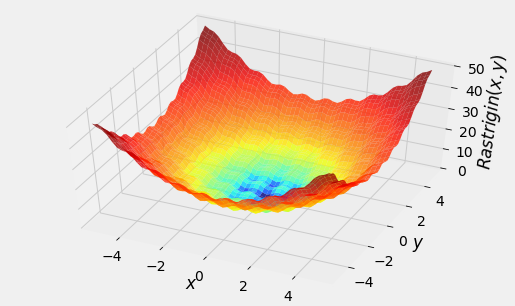

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
plt.style.use("fivethirtyeight")

xmin, xmax, xstep = -5, 5, .2
ymin, ymax, ystep = -5, 5, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = ras(torch.tensor([x, y]),A=1).numpy()

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-65)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$Rastrigin(x,y)$')

#ax.set_xlim((xmin, xmax))
#ax.set_ylim((ymin, ymax))

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Log scale: values of z <= 0 have been masked
  import sys


[[5.         4.98999977 4.98001289 4.9700489  4.96011782 4.95023012
  4.94039631 4.93062735 4.9209342  4.91132736 4.90181732 4.89241362
  4.88312578 4.8739624  4.86493063 4.85603714 4.84728718 4.83868504
  4.83023357 4.82193422 4.81378698 4.80579042 4.79794216 4.7902379
  4.78267288 4.77524042 4.76793289 4.76074219 4.75365877 4.74667215
  4.73977089 4.73294353 4.72617769 4.71946049 4.71277809 4.70611668
  4.69946194 4.69279957 4.68611383 4.67938995 4.67261219 4.66576529
  4.65883255 4.65179825 4.64464569 4.63735867 4.62992001 4.6223135
  4.61452198 4.60652924 4.59831858 4.58987427 4.5811801  4.5722208
  4.56298208 4.55345058 4.54361391 4.53346062 4.52298164 4.51216936
  4.50101805 4.48952389 4.47768593 4.4655056  4.45298672 4.44013548
  4.42696047 4.41347265 4.39968538 4.38561392 4.37127495 4.35668755
  4.34187174 4.32684898 4.31164217 4.29627514 4.28077221 4.26515913
  4.24946213 4.23370838 4.21792507 4.20214033 4.18638277 4.17068148
  4.15506554 4.13956404 4.12420654 4.10902214 4.094

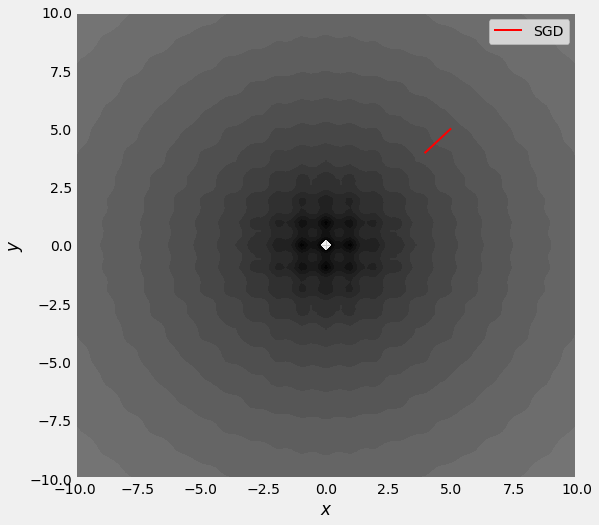

In [3]:
xmin, xmax, xstep = -10, 10, .2
ymin, ymax, ystep = -10, 10, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = ras(torch.tensor([x, y])).numpy()

fig, ax = plt.subplots(figsize=(8, 8))
ax.contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)

p = torch.tensor([[5.0],[5.0]], requires_grad=True)
#opt = optim.SGD([p], lr=0.01)
#opt = optim.SGD([p], lr=0.01, momentum=0.9)
#opt = optim.Adagrad([p], lr=0.01)
opt = optim.Adam([p], lr=0.01)

path = np.empty((2,0))
path = np.append(path, p.data.numpy(), axis=1)

for i in range(100):
    opt.zero_grad()
    output = ras(p)
    output.backward()
    opt.step()
    path = np.append(path, p.data.numpy(), axis=1)

ax.plot(path[0], path[1], color='red', label='SGD', linewidth=2)

ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

print(path)

Text(0.5, 1.0, 'Error over time for various optimisers')

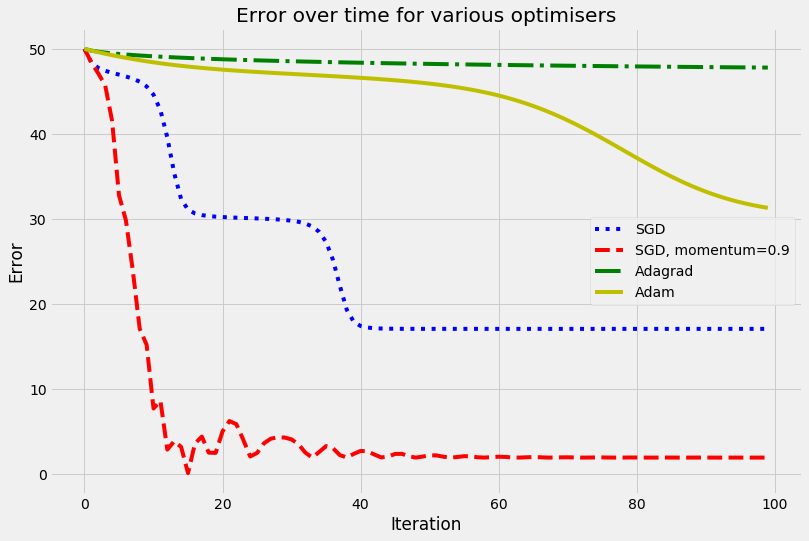

In [4]:
err1, err2, err3, err4 = [],[],[],[]

steps = 100

p1 = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt1 = optim.SGD([p1], lr=0.01)
for i in range(steps):
    opt1.zero_grad()
    output = ras(p1)
    err1.append(float(output[0]))
    output.backward()
    opt1.step()

p2 = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt2 = optim.SGD([p2], lr=0.01, momentum=0.9)
for i in range(steps):
    opt2.zero_grad()
    output = ras(p2)
    err2.append(float(output[0]))
    output.backward()
    opt2.step()

p3 = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt3 = optim.Adagrad([p3], lr=0.01)
for i in range(steps):
    opt3.zero_grad()
    output = ras(p3)
    err3.append(float(output[0]))
    output.backward()
    opt3.step()
    
p4 = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt4 = optim.Adam([p4], lr=0.01)
for i in range(steps):
    opt4.zero_grad()
    output = ras(p4)
    err4.append(float(output[0]))
    output.backward()
    opt4.step()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(err1, color="b", linestyle=":", label="SGD")
ax.plot(err2, color="r", linestyle="--", label="SGD, momentum=0.9")
ax.plot(err3, color="g", linestyle="-.", label="Adagrad")
ax.plot(err4, color="y", label="Adam")

ax.legend()
ax.set_xlabel('Iteration')
ax.set_ylabel('Error')
ax.set_title("Error over time for various optimisers")


In [5]:
import torch
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
df = df.sample(frac=1,random_state=0) # shuffle

df = df[df[4].isin(["Iris-virginica","Iris-versicolor"])] # filter

# add label indices column
mapping = {k:v for v,k in enumerate(df[4].unique())}
df[5] = (2*df[4].map(mapping))-1 #labels in {-1,1}

# normalise data
alldata = torch.tensor(df.iloc[:,[0,1,2,3]].values, dtype=torch.float)
alldata = (alldata-alldata.mean(dim=0))/alldata.var(dim=0)

# create datasets
targets_tr = torch.tensor(df.iloc[:75,5].values, dtype=torch.long)
targets_va = torch.tensor(df.iloc[75:,5].values, dtype=torch.long)
data_tr = alldata[:75]
data_va = alldata[75:]

In [6]:
def hinge_loss(y_pred, y_true):
    val = 1-y_pred*y_true
    return max(torch.tensor(0.0,requires_grad=True),1-y_pred*y_true)

def svm(x, w, b):
    h = (w*x).sum(1) + b
    return h

from torch.utils import data
dataset = data.TensorDataset(data_tr,targets_tr) # create your datset
dataloader = data.DataLoader(dataset, batch_size=25, shuffle=True) # create your dataloader

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


Validation accuracy: 0.88


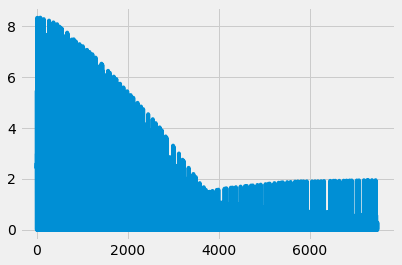

In [16]:
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)

#opt = optim.SGD([w,b], lr=0.01, weight_decay=0.0001)
opt = optim.Adam([w,b], lr=0.01, weight_decay=0.0001)

err1,err2=[],[]

for epoch in range(100):
    for batch in dataloader:
        opt.zero_grad()
        for i in range(len(batch[0])):
            xi = torch.tensor(batch[0][i], requires_grad=True)
            yi = torch.tensor(float(batch[1][i]), requires_grad=True)
            loss = hinge_loss(yi,svm(xi,w,b))
            err1.append(float(loss))
            loss.backward()
        opt.step()

plt.plot(err1)

acc = 0
for i in range(len(data_va)):
    x = data_va[i]
    y = targets_va[i]
    y_pred = (w*x).sum(1) + b
    if y_pred>0:
        if y>0:
            acc += 1
    elif y<0:
        acc += 1
print("Validation accuracy:",acc/len(data_va))

In [17]:
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)

acc = 0
for i in range(len(data_va)):
    x = data_va[i]
    y = targets_va[i]
    y_pred = (w*x).sum(1) + b
    if y_pred>0:
        if y>0:
            acc += 1
    elif y<0:
        acc += 1
print("Validation accuracy (random initialisation):",acc/len(data_va))

Validation accuracy (random initialisation): 0.72


In [18]:
acclist = []
for j in range(100):
    # normalise data
    alldata = torch.tensor(df.iloc[:,[0,1,2,3]].values, dtype=torch.float)
    alldata = (alldata-alldata.mean(dim=0))/alldata.var(dim=0)

    # create datasets
    targets_tr = torch.tensor(df.iloc[:75,5].values, dtype=torch.long)
    targets_va = torch.tensor(df.iloc[75:,5].values, dtype=torch.long)
    data_tr = alldata[:75]
    data_va = alldata[75:]
    w = torch.randn(1, 4, requires_grad=True)
    b = torch.randn(1, requires_grad=True)

    acc = 0
    for i in range(len(data_va)):
        x = data_va[i]
        y = targets_va[i]
        y_pred = (w*x).sum(1) + b
        if y_pred>0:
            if y>0:
                acc += 1
        elif y<0:
            acc += 1
    acclist.append(acc/len(data_va))
print(np.mean(acclist))

0.4892
